In [2]:
%cd /home/qcp24001/Open-GroundingDino

/home/qcp24001/Open-GroundingDino


In [3]:
import wandb

In [4]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: Currently logged in as: cclin620 (cclin620-university-of-connecticut). Use `wandb login --relogin` to force relogin


True

In [5]:
run = wandb.init(project="lora_grounding_dino")

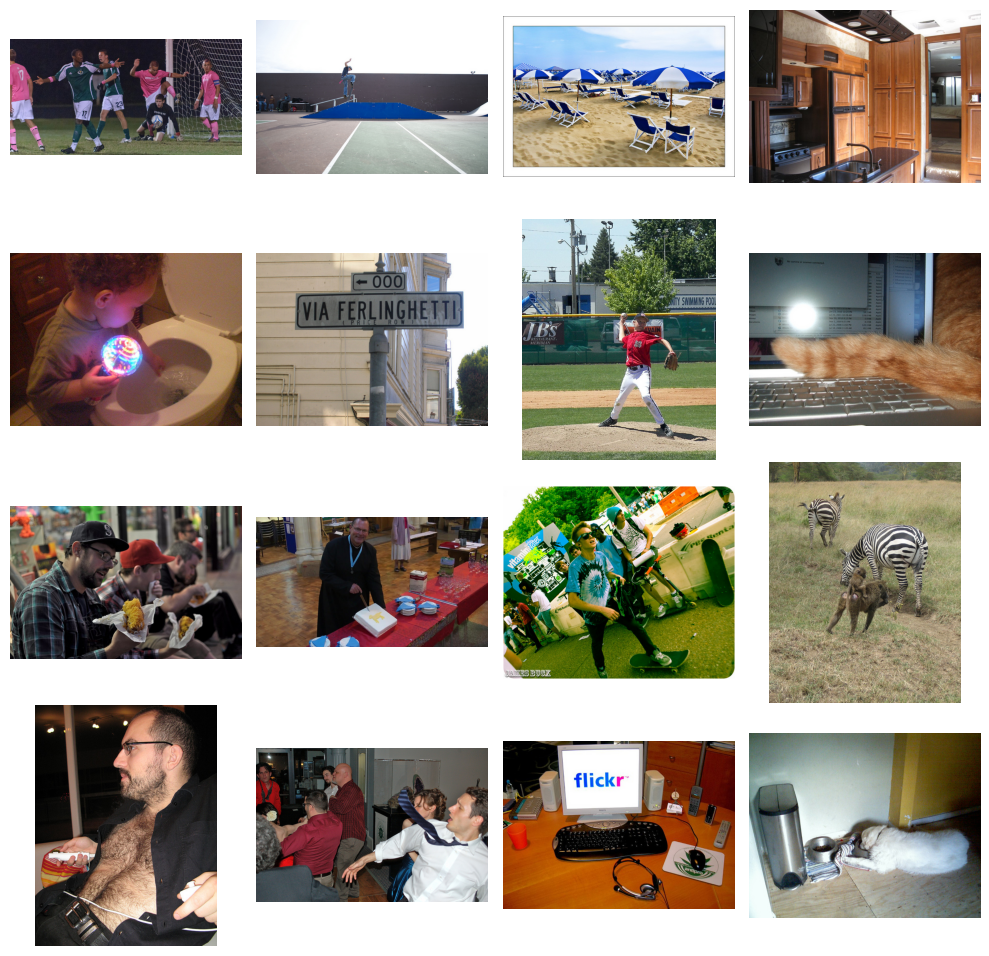

In [1]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Path to the folder containing the images
folder_path = '/home/qcp24001/mmdetection/data/coco/train2017'

# Get a list of all files in the folder
all_files = os.listdir(folder_path)

# Filter the list to include only files with image extensions
image_files = [file for file in all_files if file.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]

# Randomly select 16 images from the list
selected_images = random.sample(image_files, 16)

# Set up the plot grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot each selected image in the grid
for ax, image_file in zip(axes.flatten(), selected_images):
    # Open the image file
    img = Image.open(os.path.join(folder_path, image_file))

    # Display the image on the grid
    ax.imshow(img)
    ax.axis('off')  # Hide the axes

# Adjust the layout to be tight
plt.tight_layout()

# Show the plot
plt.show()

In [1]:
!pip install jsonlines

DEPRECATION: Loading egg at /home/qcp24001/miniconda3/lib/python3.12/site-packages/MultiScaleDeformableAttention-1.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


### coco to odvg format for training

In [ ]:
!python /home/qcp24001/Open-GroundingDino/tools/coco2odvg.py --input "/home/qcp24001/mmdetection/data/coco/annotations/instances_train2014.json"  --output "/home/qcp24001/Open-GroundingDino/config/coco2014_train_odvg.jsonl"

In [ ]:
#make a output directory to store the checkpoints of trained model
import os
os.makedirs("/content/output", exist_ok=True)

In [1]:
%%javascript
Jupyter.notebook.set_autosave_interval(30000);  // Autosave every 30 seconds

<IPython.core.display.Javascript object>

In [ ]:
!chmod +x train.sh
!./train.sh 4 config/cfg_train.py config/datasets_od_example.json ./output_5

/home/qcp24001/miniconda3/lib/python3.12/site-packages/torch/distributed/launch.py:208: FutureWarning: The module torch.distributed.launch is deprecated
and will be removed in future. Use torchrun.
Note that --use-env is set by default in torchrun.
If your script expects `--local-rank` argument to be set, please
change it to read from `os.environ['LOCAL_RANK']` instead. See 
https://pytorch.org/docs/stable/distributed.html#launch-utility for 
further instructions

  main()
W1202 15:10:15.562000 140056579143488 torch/distributed/run.py:779] 
W1202 15:10:15.562000 140056579143488 torch/distributed/run.py:779] *****************************************
W1202 15:10:15.562000 140056579143488 torch/distributed/run.py:779] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1202 15:10:15.562000 140056579143488 torch/distributed/run.py:77